In [ ]:
import numpy as np
import pandas as pd
import random
import math
import time
import matplotlib.pyplot as plt
from copy import deepcopy

# Dataset

- **Name**: name of appliance
- **Type**: non-shiftable (NS), power-shiftable operable at different power levels (PS), time-shiftable operable at any time slot within normal working slots (TS)
- **Diss.Coeff.**: dissatisfaction coefficient / factor determining weightage of deviation from maximum power level for power shiftable appliances and from earliest normal working slot (waiting time) for time shiftable appliances
- **Power rating**: appliance's power levels
- **Time Slot**: normal working slots for each appliance

In [ ]:
num_slots = 8

In [ ]:
appliance_data = [['Ref', 'NS', 100, 0.5, [1, num_slots]], ['AS', 'NS', 100, 0.1, [1, num_slots]], 
                  ['AC1', 'PS', 0.05, [0.7, 1.4, 0.1], [1, num_slots]], ['AC2', 'PS', 50, [0.7, 1.4, 0.1], [1, num_slots]], 
                  ['H', 'PS', 0.12, [0.5, 1.5, 0.1], [1, num_slots]], 
                  ['L1', 'PS', 20, [0.2, 0.6, 0.1], [5, 7]],
                  ['L2', 'PS', 0.03, [0.2, 0.6, 0.1], [5, 7]],
                  ['WM', 'TS', 0.1, 0.7, [6, 8]],
                  ['DW', 'TS', 0.06, 0.3, [6, 8]]]
  
appliance_df = pd.DataFrame(appliance_data, columns=['Name', 'Type', 'Diss. Coeff.', 'Power Rating (kWh)', 'Time Slot'])
appliance_df

appliance_df = appliance_df.sort_values('Diss. Coeff.', ascending = False)
appliance_df

,Name,Type,Diss. Coeff.,Power Rating (kWh),Time Slot
0,Ref,NS,100.00,0.5,"[1, 8]"
1,AS,NS,100.00,0.1,"[1, 8]"
3,AC2,PS,50.00,"[0.7, 1.4, 0.1]","[1, 8]"
5,L1,PS,20.00,"[0.2, 0.6, 0.1]","[5, 7]"
4,H,PS,0.12,"[0.5, 1.5, 0.1]","[1, 8]"
7,WM,TS,0.10,0.7,"[6, 8]"
8,DW,TS,0.06,0.3,"[6, 8]"
2,AC1,PS,0.05,"[0.7, 1.4, 0.1]","[1, 8]"
6,L2,PS,0.03,"[0.2, 0.6, 0.1]","[5, 7]"


# Electricity Price Generation

In [ ]:
ep_mx_q1 = 35
ep_mx_q2 = 35
ep_mx_q3 = 30
ep_mx_q4 = 20
ep_k = 5
min_price = 7

<Figure size 432x288 with 0 Axes>

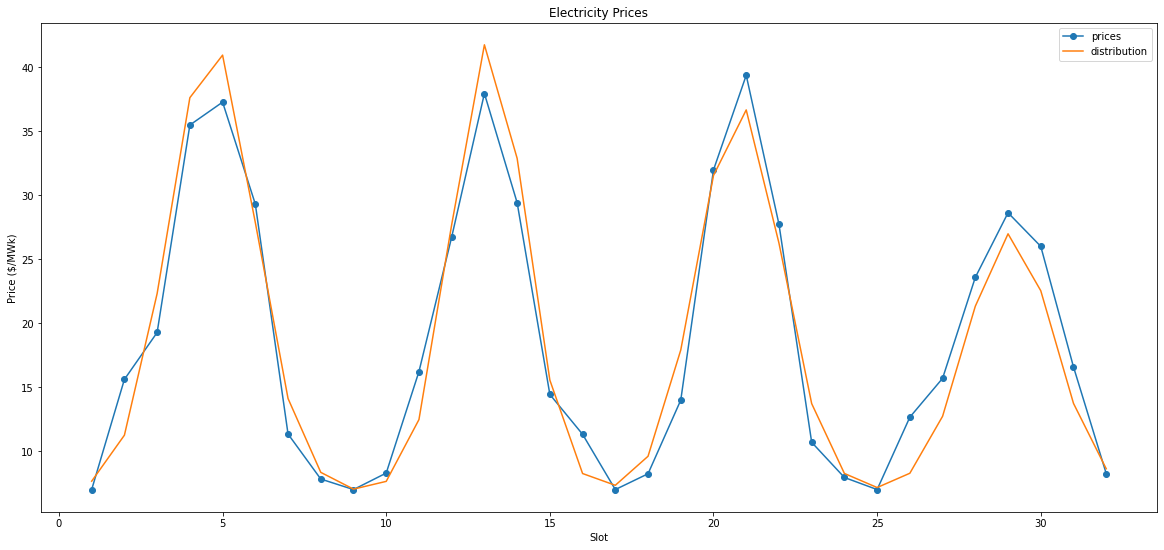

In [ ]:
num_points = 1000

mu, sigma = 0, 1.0/(np.sqrt(2 * np.pi) * ep_mx_q1)
s = np.random.normal(mu, sigma, num_points)
count, bins, ignored = plt.hist(s, num_slots, density=True)
plt.clf()
electricity_prices = [max(0, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (i - mu)**2 / (2 * sigma**2)) + random.uniform(-ep_k, ep_k)) for i in bins[:-1]]
distribution = [1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (i - mu)**2 / (2 * sigma**2)) for i in bins[:-1]]

mu, sigma = 0, 1.0/(np.sqrt(2 * np.pi) * ep_mx_q2)
s = np.random.normal(mu, sigma, num_points)
count, bins, ignored = plt.hist(s, num_slots, density=True)
plt.clf()
electricity_prices += [max(0, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (i - mu)**2 / (2 * sigma**2)) + random.uniform(-ep_k, ep_k)) for i in bins[:-1]]
distribution += [1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (i - mu)**2 / (2 * sigma**2)) for i in bins[:-1]]

mu, sigma = 0, 1.0/(np.sqrt(2 * np.pi) * ep_mx_q3)
s = np.random.normal(mu, sigma, num_points)
count, bins, ignored = plt.hist(s, num_slots, density=True)
plt.clf()
electricity_prices += [max(0, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (i - mu)**2 / (2 * sigma**2)) + random.uniform(-ep_k, ep_k)) for i in bins[:-1]]
distribution += [1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (i - mu)**2 / (2 * sigma**2)) for i in bins[:-1]]

mu, sigma = 0, 1.0/(np.sqrt(2 * np.pi) * ep_mx_q4)
s = np.random.normal(mu, sigma, num_points)
count, bins, ignored = plt.hist(s, num_slots, density=True)
plt.clf()
electricity_prices += [max(0, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (i - mu)**2 / (2 * sigma**2)) + random.uniform(-ep_k, ep_k)) for i in bins[:-1]]
distribution += [1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (i - mu)**2 / (2 * sigma**2)) for i in bins[:-1]]

electricity_prices = [i + min_price for i in electricity_prices]
distribution = [i + min_price for i in distribution]

slots = range(1, 4*num_slots+1)
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(9)
plt.title("Electricity Prices")
plt.xlabel("Slot")
plt.ylabel("Price ($/MWk)")
plt.plot(slots, electricity_prices, "-o", label = "prices")
plt.plot(slots, distribution, label = "distribution")
plt.legend()
plt.show()

# Solar Power Generation

Not used in current code as it is fixed allocation in each timeslot.

In [ ]:
sp_mx_q1 = 200
sp_mx_q2 = 200
sp_mx_q3 = 250
sp_mx_q4 = 100
sp_k = 20

<Figure size 432x288 with 0 Axes>

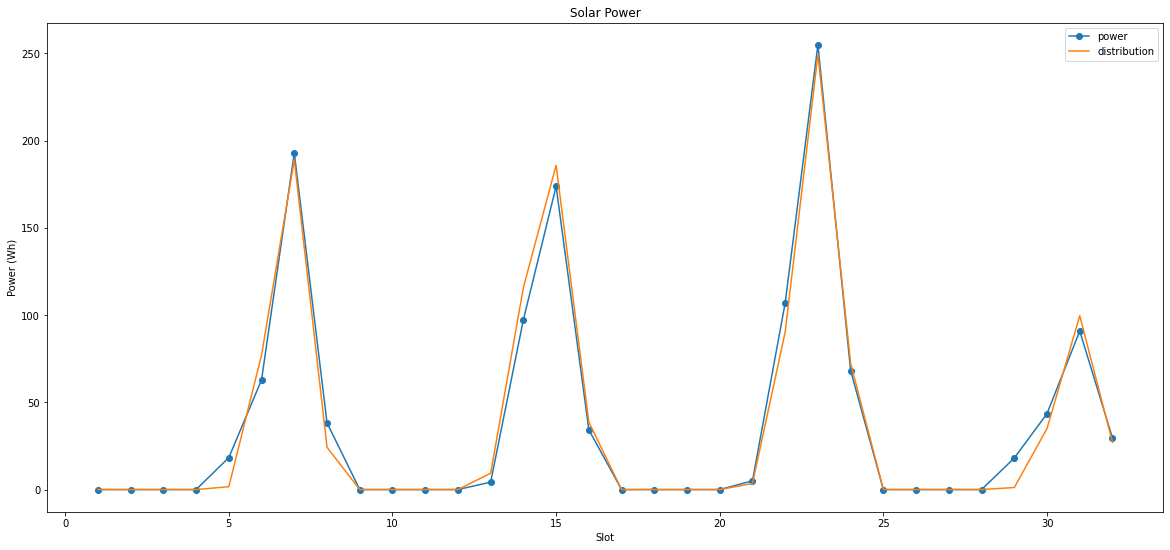

In [ ]:
num_points = 1000

solar_power = [0.0 for i in range(num_slots - num_slots//2)]
distribution = [0.0 for i in range(num_slots - num_slots//2)]

mu, sigma = 0, 1.0/(np.sqrt(2 * np.pi) * sp_mx_q1)
s = np.random.normal(mu, sigma, num_points)
count, bins, ignored = plt.hist(s, num_slots//2, density=True)
plt.clf()
solar_power += [max(0, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (i - mu)**2 / (2 * sigma**2)) + random.uniform(-sp_k, sp_k)) for i in bins[:-1]]
distribution += [1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (i - mu)**2 / (2 * sigma**2)) for i in bins[:-1]]

solar_power += [0.0 for i in range(num_slots - num_slots//2)]
distribution += [0.0 for i in range(num_slots - num_slots//2)]

mu, sigma = 0, 1.0/(np.sqrt(2 * np.pi) * sp_mx_q2)
s = np.random.normal(mu, sigma, num_points)
count, bins, ignored = plt.hist(s, num_slots//2, density=True)
plt.clf()
solar_power += [max(0, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (i - mu)**2 / (2 * sigma**2)) + random.uniform(-sp_k, sp_k)) for i in bins[:-1]]
distribution += [1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (i - mu)**2 / (2 * sigma**2)) for i in bins[:-1]]

solar_power += [0.0 for i in range(num_slots - num_slots//2)]
distribution += [0.0 for i in range(num_slots - num_slots//2)]

mu, sigma = 0, 1.0/(np.sqrt(2 * np.pi) * sp_mx_q3)
s = np.random.normal(mu, sigma, num_points)
count, bins, ignored = plt.hist(s, num_slots//2, density=True)
plt.clf()
solar_power += [max(0, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (i - mu)**2 / (2 * sigma**2)) + random.uniform(-sp_k, sp_k)) for i in bins[:-1]]
distribution += [1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (i - mu)**2 / (2 * sigma**2)) for i in bins[:-1]]

solar_power += [0.0 for i in range(num_slots - num_slots//2)]
distribution += [0.0 for i in range(num_slots - num_slots//2)]

mu, sigma = 0, 1.0/(np.sqrt(2 * np.pi) * sp_mx_q4)
s = np.random.normal(mu, sigma, num_points)
count, bins, ignored = plt.hist(s, num_slots//2, density=True)
plt.clf()
solar_power += [max(0, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (i - mu)**2 / (2 * sigma**2)) + random.uniform(-sp_k, sp_k)) for i in bins[:-1]]
distribution += [1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (i - mu)**2 / (2 * sigma**2)) for i in bins[:-1]]


slots = range(1,  4*num_slots+1)
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(9)
plt.title("Solar Power")
plt.xlabel("Slot")
plt.ylabel("Power (Wh)")
plt.plot(slots, solar_power, "-o", label = "power")
plt.plot(slots, distribution, label = "distribution")
plt.legend()
plt.show()

In [ ]:
states = []
for i in range(1, num_slots + 1):
    states.append((electricity_prices[i-1], solar_power[i-1]))

states

[(7, 0.0),
 (15.602279727337844, 0.0),
 (19.26662548892838, 0.0),
 (35.466597339307334, 0.0),
 (37.25448101066665, 18.309597674418082),
 (29.293973053510776, 62.89061381977774),
 (11.33558823393894, 192.86902154043128),
 (7.822240423853112, 38.23853090991156)]

In [ ]:
agents = appliance_df['Name'].tolist()
agent_actions = {}
for agent in agents:
    agent_data = appliance_df.loc[appliance_df['Name'] == agent]
    if (agent_data['Type'] == 'NS').bool():
        agent_actions[agent] = ['on']
    elif (agent_data['Type'] == 'PS').bool():
        pr = agent_data['Power Rating (kWh)'].tolist()[0]
        agent_actions[agent] = [round(i, 1) for i in np.arange(pr[0], pr[1] + pr[2], pr[2])]
    elif (agent_data['Type'] == 'TS').bool():
        agent_actions[agent] = ['on', 'off']
agent_actions

{'Ref': ['on'],
 'AS': ['on'],
 'AC2': [0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4],
 'L1': [0.2, 0.3, 0.4, 0.5, 0.6],
 'H': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5],
 'WM': ['on', 'off'],
 'DW': ['on', 'off'],
 'AC1': [0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4],
 'L2': [0.2, 0.3, 0.4, 0.5, 0.6]}

In [ ]:
def in_slot(t, ts):
    if t + 1 >= ts[0] and t + 1 <= ts[1]:
            return True
    return False

In [ ]:
without_DR_actions = {}
for t in range(num_slots):
    without_DR_actions[t] = {}
    for agent in agents:
        without_DR_actions[t][agent] = None
        act = None
        agent_data = appliance_df.loc[appliance_df['Name'] == agent]
        if (agent_data['Type'] == 'NS').bool():
            ts = agent_data['Time Slot'].tolist()[0]
            if in_slot(t, ts):
                pr = agent_data['Power Rating (kWh)'].tolist()[0]
                act = 'on'
        elif (agent_data['Type'] == 'PS').bool():
            ts = agent_data['Time Slot'].tolist()[0]
            if in_slot(t, ts):
                pr = agent_data['Power Rating (kWh)'].tolist()[0]
                act = pr[1]
        elif (agent_data['Type'] == 'TS').bool():
            ts = agent_data['Time Slot'].tolist()[0]
            if in_slot(t, ts):
                pr = agent_data['Power Rating (kWh)'].tolist()[0]
                if t + 1 == ts[0]:
                    act = 'on'
                else:
                    act = 'off'
        without_DR_actions[t][agent] = act

# Multi-Agent Q Learning

Agents take that action which maximizes their own expected cumulative reward.

In [ ]:
cols = ['Name', 'Type', 'Diss. Coeff.', 'Power Rating (kWh)', 'Time Slot']

def get_reward_DR(st, t, agent, act, started):
    reward = 0.0
    cost = 0.0
    agent_data = appliance_df.loc[appliance_df['Name'] == agent]
    if (agent_data['Type'] == 'NS').bool():
        ts = agent_data['Time Slot'].tolist()[0]
        if in_slot(t, ts):
            pr = agent_data['Power Rating (kWh)'].tolist()[0]
            reward = (-st[0] * max(0, (pr)))
            cost = (-st[0] * max(0, (pr)))
    elif (agent_data['Type'] == 'PS').bool():
        ts = agent_data['Time Slot'].tolist()[0]
        if in_slot(t, ts):
            pr = agent_data['Power Rating (kWh)'].tolist()[0]
            dc = agent_data['Diss. Coeff.'].tolist()[0]
            reward = ((-st[0] * max(0, (act))) - (dc * math.pow(pr[1] - act, 2)))
            cost = (-st[0] * max(0, (act)))
    elif (agent_data['Type'] == 'TS').bool():
        ts = agent_data['Time Slot'].tolist()[0]
        if in_slot(t, ts):
            pr = agent_data['Power Rating (kWh)'].tolist()[0]
            dc = agent_data['Diss. Coeff.'].tolist()[0]
            if (act == 'on' or (t + 1 == ts[1])) and started[agent] != 1:
                reward = - (st[0] * max(0, pr) - (dc * math.pow(ts[0] - t - 1, 2)))
                cost = (-st[0] * max(0, (pr)))
                started[agent] = 1
    return round(reward, 6), cost, started

def get_reward_without_DR(st, t, agent):
    reward = 0.0
    cost = 0.0
    agent_data = appliance_df.loc[appliance_df['Name'] == agent]
    if (agent_data['Type'] == 'NS').bool():
        ts = agent_data['Time Slot'].tolist()[0]
        if in_slot(t, ts):
            pr = agent_data['Power Rating (kWh)'].tolist()[0]
            reward = (-st[0] * max(0, (pr)))
            cost = (-st[0] * max(0, (pr)))
    elif (agent_data['Type'] == 'PS').bool():
        ts = agent_data['Time Slot'].tolist()[0]
        if in_slot(t, ts):
            pr = agent_data['Power Rating (kWh)'].tolist()[0]
            reward = (-st[0] * max(0, (pr[1])))
            cost = (-st[0] * max(0, (pr[1])))

    elif (agent_data['Type'] == 'TS').bool():
        ts = agent_data['Time Slot'].tolist()[0]
        if in_slot(t, ts):
            pr = agent_data['Power Rating (kWh)'].tolist()[0]
            if t + 1 == ts[0]:
                reward = - (st[0] * max(0, pr))
                cost = - (st[0] * max(0, pr))
    return round(reward, 6), cost


started = {}
for agent in agents:
        started[agent] = 0
print(get_reward_DR(states[6], 6, 'WM', 'on', started))
print(get_reward_without_DR(states[6], 6, 'WM'))

(-7.834912, -7.934911763757258, {'Ref': 0, 'AS': 0, 'AC2': 0, 'L1': 0, 'H': 0, 'WM': 1, 'DW': 0, 'AC1': 0, 'L2': 0})
(0.0, 0.0)


In [ ]:
num_timeslots = num_slots
num_episodes = 1000
epsilon = 0.3

gamma = 0.9
theta = 0.3

converged = 1
threshold = 0.001

recommendations = {}
actually_started = {}

for t in range(num_timeslots):
    actually_started[t] = {}
    for agent in agents:
        actually_started[t][agent] = 0

started = {}
for agent in agents:
        started[agent] = 0

Without_DR_total_reward = 0.0
With_DR_total_reward = 0.0

Without_DR_total_electricity_cost = 0.0
With_DR_total_electricity_cost = 0.0

average_time = 0

for t in range(num_timeslots):
    print('Slot: ', t + 1)
    start = time.time()
    recommendations[t] = {}
    Q = {}
    Q_prev = {}
    R = {}
    C = {}
    for st in states:
        Q[st] = {}
        Q_prev[st] = {}
        R[st] = {}
        C[st] = {}
        for agent in agents:
            Q[st][agent] = {}
            Q_prev[st][agent] = {}
            R[st][agent] = {}
            C[st][agent] = {}
            recommendations[t][agent] = None
    converged = 1
    for agent in agents:
        print('Appliance: ', agent)
        for st in states:
            for act in agent_actions[agent]:
                Q[st][agent][act] = 0.0
                Q_prev[st][agent][act] = 0.0
        if t > 0:
            started[agent] = actually_started[t - 1][agent]
        else:
            started[agent] = 0
        for eps in range(num_episodes):
            if t > 0:
                if actually_started[t-1][agent] != 1:
                    started[agent] = 0
            else:
                started[agent] = 0
            Q_prev = deepcopy(Q)
            st = states[t]
            itr = 0
            curr_t = t
            while curr_t < num_slots - 1:
                p = np.random.random()
                if p < epsilon:
                    j = np.random.choice(len(agent_actions[agent]))
                else:
                    j = np.argmax([Q[st][agent][a] for a in agent_actions[agent]])
                at = agent_actions[agent][j]
                sdash = states[curr_t + 1]
                R[st][agent][at], C[st][agent][at], started = get_reward_DR(st, curr_t, agent, at, started)
                Q[st][agent][at] = Q[st][agent][at] + theta * (R[st][agent][at] + gamma * max([Q[sdash][agent][act] for act in agent_actions[agent]]) - Q[st][agent][at]) 
                st = sdash
                curr_t += 1
            converged = 1
            for s in states:
                for a in agent_actions[agent]:
                    if abs(Q[s][agent][a] - Q_prev[s][agent][a]) > threshold:
                        converged = 0
            if converged == 1:
                conv_eps = eps
                break
        recommendations[t][agent] = agent_actions[agent][np.argmax([Q[states[t]][agent][a] for a in agent_actions[agent]])]
        agent_data = appliance_df.loc[appliance_df['Name'] == agent]
        slot = agent_data['Time Slot'].tolist()[0]
        if not in_slot(t, slot):
            recommendations[t][agent] = None
        if (appliance_df.loc[appliance_df['Name'] == agent]['Type'] == 'TS').bool() and actually_started[t][agent] == 1:
            recommendations[t][agent] = 'off'
        if recommendations[t][agent] == 'on' and (appliance_df.loc[appliance_df['Name'] == agent]['Type'] == 'TS').bool():
            if t + 1 < num_timeslots:
                actually_started[t + 1][agent] = 1
        if recommendations[t][agent] == 'off' and (appliance_df.loc[appliance_df['Name'] == agent]['Type'] == 'TS').bool() and actually_started[t][agent] == 0 and t + 1 ==  slot[1]:
            if t + 1 < num_timeslots: 
                actually_started[t + 1][agent] = 1
            recommendations[t][agent] = 'on'
    print(converged)
    end = time.time()
    print('Time taken to recommend (s): ', end-start)
    average_time += (end-start)
    print("Slot: ", t + 1, " | Recommendations: ", recommendations[t])


Slot:  1
Appliance:  Ref
Appliance:  AS
Appliance:  AC2
Appliance:  L1
Appliance:  H
Appliance:  WM
Appliance:  DW
Appliance:  AC1
Appliance:  L2
1
Time taken to recommend (s):  6.486686706542969
Slot:  1  | Recommendations:  {'Ref': 'on', 'AS': 'on', 'AC2': 1.3, 'L1': None, 'H': 0.5, 'WM': None, 'DW': None, 'AC1': 0.7, 'L2': None}
Slot:  2
Appliance:  Ref
Appliance:  AS
Appliance:  AC2
Appliance:  L1
Appliance:  H
Appliance:  WM
Appliance:  DW
Appliance:  AC1
Appliance:  L2
1
Time taken to recommend (s):  5.2431886196136475
Slot:  2  | Recommendations:  {'Ref': 'on', 'AS': 'on', 'AC2': 1.2, 'L1': None, 'H': 0.5, 'WM': None, 'DW': None, 'AC1': 0.7, 'L2': None}
Slot:  3
Appliance:  Ref
Appliance:  AS
Appliance:  AC2
Appliance:  L1
Appliance:  H
Appliance:  WM
Appliance:  DW
Appliance:  AC1
Appliance:  L2
1
Time taken to recommend (s):  3.6918959617614746
Slot:  3  | Recommendations:  {'Ref': 'on', 'AS': 'on', 'AC2': 1.2, 'L1': None, 'H': 0.5, 'WM': None, 'DW': None, 'AC1': 0.7, 'L2': No

In [ ]:
Appliance_Without_DR_Cost = {}
Appliance_With_DR_Cost = {}

Timeslot_Without_DR_Cost = {}
Timeslot_With_DR_Cost = {}

Appliance_Without_DR_Reward = {}
Appliance_With_DR_Reward = {}

Without_DR_total_reward = 0
With_DR_total_reward = 0
Without_DR_total_electricity_cost = 0
With_DR_total_electricity_cost = 0

for agent in agents:
    Appliance_Without_DR_Cost[agent] = 0
    Appliance_With_DR_Cost[agent] = 0
    Appliance_Without_DR_Reward[agent] = 0
    Appliance_With_DR_Reward[agent] = 0

for t in range(num_timeslots):
    Timeslot_Without_DR_Cost[t] = 0
    Timeslot_With_DR_Cost[t] = 0
    for agent in agents:
        temp = deepcopy(actually_started)

        rew, c, actually_started[t] = get_reward_DR(states[t], t, agent, recommendations[t][agent], actually_started[t])
        actually_started = temp
        With_DR_total_reward += rew
        Appliance_With_DR_Reward[agent] -= rew
        With_DR_total_electricity_cost += c
        Appliance_With_DR_Cost[agent] -= c
        Timeslot_With_DR_Cost[t] -= c

        rew, c = get_reward_without_DR(states[t], t, agent)
        Without_DR_total_reward += rew
        Appliance_Without_DR_Reward[agent] -= rew
        Without_DR_total_electricity_cost += c
        Appliance_Without_DR_Cost[agent] -= c
        Timeslot_Without_DR_Cost[t] -= c

In [ ]:
for t in range(num_timeslots):
    print("Slot: ", t + 1, " | Recommendations: ", recommendations[t])
    print("Slot: ", t + 1, " | Original Actions: ", without_DR_actions[t])
    print()

Slot:  1  | Recommendations:  {'Ref': 'on', 'AS': 'on', 'AC2': 1.3, 'L1': None, 'H': 0.5, 'WM': None, 'DW': None, 'AC1': 0.7, 'L2': None}
Slot:  1  | Original Actions:  {'Ref': 'on', 'AS': 'on', 'AC2': 1.4, 'L1': None, 'H': 1.5, 'WM': None, 'DW': None, 'AC1': 1.4, 'L2': None}

Slot:  2  | Recommendations:  {'Ref': 'on', 'AS': 'on', 'AC2': 1.2, 'L1': None, 'H': 0.5, 'WM': None, 'DW': None, 'AC1': 0.7, 'L2': None}
Slot:  2  | Original Actions:  {'Ref': 'on', 'AS': 'on', 'AC2': 1.4, 'L1': None, 'H': 1.5, 'WM': None, 'DW': None, 'AC1': 1.4, 'L2': None}

Slot:  3  | Recommendations:  {'Ref': 'on', 'AS': 'on', 'AC2': 1.2, 'L1': None, 'H': 0.5, 'WM': None, 'DW': None, 'AC1': 0.7, 'L2': None}
Slot:  3  | Original Actions:  {'Ref': 'on', 'AS': 'on', 'AC2': 1.4, 'L1': None, 'H': 1.5, 'WM': None, 'DW': None, 'AC1': 1.4, 'L2': None}

Slot:  4  | Recommendations:  {'Ref': 'on', 'AS': 'on', 'AC2': 1.0, 'L1': None, 'H': 0.5, 'WM': None, 'DW': None, 'AC1': 0.7, 'L2': None}
Slot:  4  | Original Actions

In [ ]:
from IPython.display import display
recom_data = {}
Recom_df = {}
for agent in agents:
    print('\n\nAppliance: ', agent, ' | Dis. Coef.: ', appliance_df.loc[appliance_df['Name'] == agent]['Diss. Coeff.'].tolist()[0])
    recom_data[agent] = [[t+1, without_DR_actions[t][agent], recommendations[t][agent], states[t][0]] for t in range(num_timeslots)]
    Recom_df[agent] = pd.DataFrame(recom_data[agent], columns=['Slot', 'Action without DR', 'Action with DR', 'Elec. Price ($/MWk)'])
    display(Recom_df[agent])



Appliance:  Ref  | Dis. Coef.:  100.0


,Slot,Action without DR,Action with DR,Elec. Price ($/MWk)
0,1,on,on,7.000000
1,2,on,on,15.602280
2,3,on,on,19.266625
3,4,on,on,35.466597
4,5,on,on,37.254481
5,6,on,on,29.293973
6,7,on,on,11.335588
7,8,on,on,7.822240




Appliance:  AS  | Dis. Coef.:  100.0


,Slot,Action without DR,Action with DR,Elec. Price ($/MWk)
0,1,on,on,7.000000
1,2,on,on,15.602280
2,3,on,on,19.266625
3,4,on,on,35.466597
4,5,on,on,37.254481
5,6,on,on,29.293973
6,7,on,on,11.335588
7,8,on,on,7.822240




Appliance:  AC2  | Dis. Coef.:  50.0


,Slot,Action without DR,Action with DR,Elec. Price ($/MWk)
0,1,1.4,1.3,7.000000
1,2,1.4,1.2,15.602280
2,3,1.4,1.2,19.266625
3,4,1.4,1.0,35.466597
4,5,1.4,1.0,37.254481
5,6,1.4,1.1,29.293973
6,7,1.4,1.3,11.335588
7,8,1.4,0.7,7.822240




Appliance:  L1  | Dis. Coef.:  20.0


,Slot,Action without DR,Action with DR,Elec. Price ($/MWk)
0,1,NaN,NaN,7.000000
1,2,NaN,NaN,15.602280
2,3,NaN,NaN,19.266625
3,4,NaN,NaN,35.466597
4,5,0.6,0.2,37.254481
5,6,0.6,0.2,29.293973
6,7,0.6,0.3,11.335588
7,8,NaN,NaN,7.822240




Appliance:  H  | Dis. Coef.:  0.12


,Slot,Action without DR,Action with DR,Elec. Price ($/MWk)
0,1,1.5,0.5,7.000000
1,2,1.5,0.5,15.602280
2,3,1.5,0.5,19.266625
3,4,1.5,0.5,35.466597
4,5,1.5,0.5,37.254481
5,6,1.5,0.5,29.293973
6,7,1.5,0.5,11.335588
7,8,1.5,0.5,7.822240




Appliance:  WM  | Dis. Coef.:  0.1


,Slot,Action without DR,Action with DR,Elec. Price ($/MWk)
0,1,None,None,7.000000
1,2,None,None,15.602280
2,3,None,None,19.266625
3,4,None,None,35.466597
4,5,None,None,37.254481
5,6,on,off,29.293973
6,7,off,off,11.335588
7,8,off,on,7.822240




Appliance:  DW  | Dis. Coef.:  0.06


,Slot,Action without DR,Action with DR,Elec. Price ($/MWk)
0,1,None,None,7.000000
1,2,None,None,15.602280
2,3,None,None,19.266625
3,4,None,None,35.466597
4,5,None,None,37.254481
5,6,on,off,29.293973
6,7,off,off,11.335588
7,8,off,on,7.822240




Appliance:  AC1  | Dis. Coef.:  0.05


,Slot,Action without DR,Action with DR,Elec. Price ($/MWk)
0,1,1.4,0.7,7.000000
1,2,1.4,0.7,15.602280
2,3,1.4,0.7,19.266625
3,4,1.4,0.7,35.466597
4,5,1.4,0.7,37.254481
5,6,1.4,0.7,29.293973
6,7,1.4,0.7,11.335588
7,8,1.4,0.7,7.822240




Appliance:  L2  | Dis. Coef.:  0.03


,Slot,Action without DR,Action with DR,Elec. Price ($/MWk)
0,1,NaN,NaN,7.000000
1,2,NaN,NaN,15.602280
2,3,NaN,NaN,19.266625
3,4,NaN,NaN,35.466597
4,5,0.6,0.2,37.254481
5,6,0.6,0.2,29.293973
6,7,0.6,0.2,11.335588
7,8,NaN,NaN,7.822240


In [ ]:
states

[(7, 0.0),
 (15.602279727337844, 0.0),
 (19.26662548892838, 0.0),
 (35.466597339307334, 0.0),
 (37.25448101066665, 18.309597674418082),
 (29.293973053510776, 62.89061381977774),
 (11.33558823393894, 192.86902154043128),
 (7.822240423853112, 38.23853090991156)]

In [ ]:
appliance_df

,Name,Type,Diss. Coeff.,Power Rating (kWh),Time Slot
0,Ref,NS,100.00,0.5,"[1, 8]"
1,AS,NS,100.00,0.1,"[1, 8]"
3,AC2,PS,50.00,"[0.7, 1.4, 0.1]","[1, 8]"
5,L1,PS,20.00,"[0.2, 0.6, 0.1]","[5, 7]"
4,H,PS,0.12,"[0.5, 1.5, 0.1]","[1, 8]"
7,WM,TS,0.10,0.7,"[6, 8]"
8,DW,TS,0.06,0.3,"[6, 8]"
2,AC1,PS,0.05,"[0.7, 1.4, 0.1]","[1, 8]"
6,L2,PS,0.03,"[0.2, 0.6, 0.1]","[5, 7]"


## Assuming Recommendations are followed, cost with and w/o Demand Response

In [ ]:
print('\n\nTotal reward without DR: ', Without_DR_total_reward)
print('Total reward with DR: ', With_DR_total_reward)

print('Total electricity cost without DR: ', -Without_DR_total_electricity_cost)
print('Total electricity cost with DR: ', -With_DR_total_electricity_cost)

print('Average Recommendation Time: ', average_time / num_timeslots)

print()
print()

dc = appliance_df['Diss. Coeff.'].tolist()
DC = {}
i = 0
for agent in agents:
    DC[agent] = dc[i]
    i += 1



Total reward without DR:  -921.6595769999998
Total reward with DR:  -568.414001
Total electricity cost without DR:  921.6595716712114
Total electricity cost with DR:  509.68359763524415
Average Recommendation Time:  2.5708343982696533




In [ ]:
data = [[agent, Appliance_Without_DR_Cost[agent], Appliance_With_DR_Cost[agent], DC[agent], Appliance_Without_DR_Reward[agent], Appliance_With_DR_Reward[agent]] for agent in agents]
  
data.append(['Total', -Without_DR_total_electricity_cost, -With_DR_total_electricity_cost, '-', Without_DR_total_reward, With_DR_total_reward])
DR_df = pd.DataFrame(data, columns=['Name', 'Cost without DR (cents)', 'Cost with DR (cents)', 'Diss. Coef.', 'Reward without DR', 'Reward with DR'])
DR_df

,Name,Cost without DR (cents),Cost with DR (cents),Diss. Coef.,Reward without DR,Reward with DR
0,Ref,81.520893,81.520893,100.0,81.520894,81.520894
1,AS,16.304179,16.304179,100.0,16.304179,16.304179
2,AC2,228.258499,176.098968,50.0,228.258500,226.098968
3,L1,46.730425,16.710367,20.0,46.730426,24.910367
4,H,244.562678,81.520893,0.12,244.562679,82.480894
5,WM,20.505781,5.475568,0.1,20.505781,5.075568
6,DW,8.788192,2.346672,0.06,8.788192,2.106672
7,AC1,228.258499,114.129250,0.05,228.258500,114.325250
8,L2,46.730425,15.576808,0.03,46.730426,15.591209
9,Total,921.659572,509.683598,-,-921.659577,-568.414001


In [ ]:
ts_data = [[t+1, Timeslot_Without_DR_Cost[t], Timeslot_With_DR_Cost[t], states[t][0], Timeslot_Without_DR_Cost[t]/states[t][0], Timeslot_With_DR_Cost[t]/states[t][0]] for t in range(num_timeslots)]
TS_df = pd.DataFrame(ts_data, columns=['Slot', 'Cost without DR (cents)', 'Cost with DR (cents)', 'Elec. Price ($/MWk)', 'Power Con. without DR (kWh)', 'Power Con. with DR (kWh)'])

TS_df

,Slot,Cost without DR (cents),Cost with DR (cents),Elec. Price ($/MWk),Power Con. without DR (kWh),Power Con. with DR (kWh)
0,1,34.300000,21.700000,7.000000,4.9,3.1
1,2,76.451171,46.806839,15.602280,4.9,3.0
2,3,94.406465,57.799876,19.266625,4.9,3.0
3,4,173.786327,99.306473,35.466597,4.9,2.8
4,5,227.252334,119.214339,37.254481,6.1,3.2
5,6,207.987209,96.670111,29.293973,7.1,3.3
6,7,69.147088,40.808118,11.335588,6.1,3.6
7,8,38.328978,27.377841,7.822240,4.9,3.5


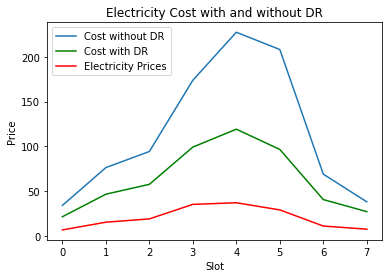

In [ ]:
prices  = []
without_DR = []
with_DR = []
for t in range(num_timeslots):
    prices.append(states[t][0])
    with_DR.append(Timeslot_With_DR_Cost[t])
    without_DR.append(Timeslot_Without_DR_Cost[t])
plt.title('Electricity Cost with and without DR')
plt.xlabel('Slot')
plt.ylabel('Price')
plt.plot(range(num_timeslots), without_DR, label="Cost without DR")
plt.plot(range(num_timeslots), with_DR, label="Cost with DR", color='g')
plt.plot(range(num_timeslots), prices, label="Electricity Prices", color='r')
plt.legend()

### Hence, we see a 40-50% cost saving with DR than without DR.

# EAQR: Parallelization

Repeated Game formulation

**Version 1**: Fully co-operative scenario where the agents try to maximize the global immediate reward.

**Version 2**: Fully co-operative scenario where the agents try to maximize the global expected reward.

**Additional Goal (Cooperation)**: To account for safety and ensure that power consumption doesn't exceed a limit at a particular timeslot. Previous solution doesn't account for such case and might give a solution where all agents are 'on' at a timeslot together, which may not be desirable.

### Let us first look at small problem and see how EAQR applies to it in this scenario.

We want to get maimum global immediate reward at timeslot t=6 and appliances are 'AC1' and 'L2'.

In [ ]:
app_data = [['AC1', 1.0, [1.0, 1.4]], ['L2', 0.4, [0.6, 0.8]]]
agts = ['AC1', 'L2']
app_df = pd.DataFrame(app_data, columns=['name', 'dc', 'actions'])
app_df

,name,dc,actions
0,AC1,1.0,"[1.0, 1.4]"
1,L2,0.4,"[0.6, 0.8]"


In [ ]:
def get_small_reward_with_DR(t, agent, act):
    reward = 0.0
    cost = 0.0
    max_pow = app_df.loc[app_df['name'] == agent]['actions'].tolist()[0][-1]
    dc = max_pow = app_df.loc[app_df['name'] == agent]['dc'].tolist()[0]
    reward = ((-states[t][0] * max(0, (act))) - (dc * math.pow(max_pow - act, 2)))
    cost = (-states[t][0] * max(0, (act)))
    return round(reward, 6), cost, act

def get_small_reward_without_DR(t, agent, act):
    reward = 0.0
    cost = 0.0
    reward = (-states[t][0] * max(0, (act)))
    cost = (-states[t][0] * max(0, (act)))
    return round(reward, 6), cost, act

def get_small_global_reward_with_DR(t, actions, penalty_factor, limit):
    global_reward = 0
    total_power = 0
    for agent in agts:
        act = actions[agent]
        global_reward += get_small_reward_with_DR(t, agent, act)[0]
        total_power += get_small_reward_with_DR(t, agent, act)[2]
    if total_power > limit:
        global_reward -= penalty_factor * (total_power - limit)
    return global_reward

def get_small_global_reward_without_DR(t, actions, penalty_factor, limit):
    global_reward = 0
    total_power = 0
    for agent in agts:
        act = actions[agent]
        global_reward += get_small_reward_without_DR(t, agent, act)[0]
        total_power += get_small_reward_without_DR(t, agent, act)[2]
    if total_power > limit:
        global_reward -= penalty_factor * (total_power - limit)
    return global_reward

In [ ]:
penalty = 0.9
lmt = 2

In [ ]:
from tabulate import tabulate
for t in range(num_timeslots):
    print('Slot: ', t)
    mydata = [
        ['AC1-action1: 1.0', get_small_global_reward_with_DR(t, {'AC1': 1.0, 'L2': 0.6}, penalty, lmt), get_small_global_reward_with_DR(t, {'AC1': 1.0, 'L2': 0.8}, penalty, lmt)],
        ['AC1-action2: 1.4', get_small_global_reward_with_DR(t, {'AC1': 1.4, 'L2': 0.6}, penalty, lmt), get_small_global_reward_with_DR(t, {'AC1': 1.4, 'L2': 0.8}, penalty, lmt)],
    ]
    
    # create header
    head = ['Payoffs', 'L2-action1: 0.6', 'L2-action2: 0.8']
    
    # display table
    print(tabulate(mydata, headers=head, tablefmt="grid"))


Slot:  0
+------------------+-------------------+-------------------+
| Payoffs          |   L2-action1: 0.6 |   L2-action2: 0.8 |
+==================+===================+===================+
| AC1-action1: 1.0 |           -11.216 |          -20.4681 |
+------------------+-------------------+-------------------+
| AC1-action2: 1.4 |           -14.176 |          -25.3423 |
+------------------+-------------------+-------------------+
Slot:  1
+------------------+-------------------+-------------------+
| Payoffs          |   L2-action1: 0.6 |   L2-action2: 0.8 |
+==================+===================+===================+
| AC1-action1: 1.0 |          -24.9796 |          -20.4681 |
+------------------+-------------------+-------------------+
| AC1-action2: 1.4 |          -31.3806 |          -25.3423 |
+------------------+-------------------+-------------------+
Slot:  2
+------------------+-------------------+-------------------+
| Payoffs          |   L2-action1: 0.6 |   L2-action2: 0.8

In [ ]:
max_games = 100000
num_games = 100
alpha = 0.5
eps = 0.5

recomm = {}
avg_time = 0

for t in range(num_timeslots):
    start = time.time()
    recomm[t] = {}
    freq = {}
    Q = {}
    p = {}
    immediate_local_rewards = {}
    my_action_history = {}
    for agent in agts:
        my_action_history[agent] = {}
        freq[agent] = {}
        Q[agent] = {}
        p[agent] = {}
    flag = 0
    game_count = -1
    max_immediate_local_reward = float('-inf')
    converged = 0
    for agent in agts:
        recomm[t][agent] = None
        actions = app_df.loc[app_df['name'] == agent]['actions'].tolist()[0]
        for act in actions:
            freq[agent][act] = 0
            Q[agent][act] = random.random()
            p[agent][act] = 0 

    for game in range(max_games):  
        game_count += 1
        immediate_local_rewards[game_count] = {}
        for agent in agts:
            immediate_local_rewards[game_count][agent] = {}  
            actions = app_df.loc[app_df['name'] == agent]['actions'].tolist()[0]  
            sum_Q = 0
            for a in actions:
                sum_Q += Q[agent][a]
            probs = []
            for act in actions:
                prob_list = [1/len(actions), Q[agent][act]/sum_Q]
                p[agent][act] = random.choices(prob_list, weights=(eps, 1-eps))[0]
                probs.append(p[agent][act])
            probs = [int(i*1000) for i in probs]
            action = random.choices(actions, weights=tuple(probs))[0]
            my_action_history[agent][game_count] = action
            immediate_local_rewards[game_count][agent]['reward'] = get_small_reward_with_DR(t, agent, action)[0]
            immediate_local_rewards[game_count][agent]['action'] = get_small_reward_with_DR(t, agent, action)[2]
            if game_count == num_games:
                converged = 1
                for a in actions:
                    num_act_in_last_ns = 0
                    num_max_in_last_ns = 0
                    for game_no in range(num_games):
                        if my_action_history[agent][game_no] == a:
                            num_act_in_last_ns += 1
                            player_actions = {}
                            for ag in agts:
                                player_actions[ag] = immediate_local_rewards[game_no][ag]['action']
                            temp = get_small_global_reward_with_DR(t, player_actions, penalty, lmt)
                            # print(max_immediate_local_reward, temp, player_actions)
                            if abs(temp - max_immediate_local_reward) < 0.0001:
                                num_max_in_last_ns += 1
                            elif temp > max_immediate_local_reward:
                                max_immediate_local_reward = temp
                                num_max_in_last_ns = 0
                    if num_act_in_last_ns > 0:
                        freq[agent][a] = num_max_in_last_ns / num_act_in_last_ns
                    if abs(alpha * (freq[agent][a] - Q[agent][a])) > 0.0001:
                        converged = 0
                    Q[agent][a] = Q[agent][a] + alpha * (freq[agent][a] - Q[agent][a])
                    flag = 1
        if flag == 1:
            if converged == 1:
                print('converged', game)
                break
            game_count = -1
            flag = 0
            for ag in agents:
                my_action_history[agent] = {}

    for a in agts:
        recomm[t][a] = max(Q[a], key=Q[a].get)
    end = time.time()
    avg_time += (end-start)
print('Average Recommendation Time: ', avg_time/num_timeslots)

converged 23027
converged 45348
converged 3029
converged 7069
converged 10503
converged 8685
converged 3433
converged 54135
Average Recommendation Time:  177.56671634316444


In [ ]:
recomm

{0: {'AC1': 1.0, 'L2': 0.6},
 1: {'AC1': 1.0, 'L2': 0.8},
 2: {'AC1': 1.0, 'L2': 0.8},
 3: {'AC1': 1.0, 'L2': 0.8},
 4: {'AC1': 1.0, 'L2': 0.8},
 5: {'AC1': 1.0, 'L2': 0.8},
 6: {'AC1': 1.0, 'L2': 0.6},
 7: {'AC1': 1.0, 'L2': 0.6}}